Extract reviews of any product from ecommerce website like amazon
Perform emotion mining


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import spacy
from nltk import tokenize
import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
path="/content/drive/MyDrive/Afinn.csv"
afinn_data=pd.read_csv(path,sep=',',encoding='latin-1')
afinn_data

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
path="/content/drive/MyDrive/apple.txt"
reviews_data=pd.read_csv(path,error_bad_lines=False)
reviews_data.head()

b'Skipping line 6: expected 1 fields, saw 14\n'


,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""


In [ ]:
#removes both the leading and the trailing characters
reviews_data = [x.strip() for x in reviews_data.x] 

In [ ]:
#removes empty strings,because they are considered in Python as False 
reviews_data = [x for x in reviews_data if x]

In [ ]:
sentences = tokenize.sent_tokenize(" ".join(reviews_data))
sentences[5:15] 

['), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Overall V

In [ ]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df 

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [ ]:
affinity_scores = afinn_data.set_index('word')['value'].to_dict()

In [ ]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [ ]:
# test that it works
calculate_sentiment(text = 'amazing') 

4

In [ ]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 

In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10) 

0    17
1     7
2    31
3     7
4    65
5     7
6    47
7    16
8    29
9    26
Name: word_count, dtype: int64

In [ ]:
sent_df 

,sentence,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,7,17
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,7,31
3,Terrific sense of possession & pride.Bad News.,4,7
4,Problems will be there if you are switching fr...,-11,65
...,...,...,...
182,You can get one of the best movie experiences ...,3,12
183,Overall I would it a 4.5/5.,0,6
184,"I got a great deal on this laptop, which I hav...",3,18
185,I got it not only on discount but also was abl...,0,18


In [ ]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,sentence,sentiment_value,word_count
110,"The build is super strong, the operating syste...",5,10
64,I hope this comment can help to save somebody’...,6,10
103,The switch was inspired by the awesome reviews...,6,13
46,Ships with macOS sierra but update is availabl...,6,86
59,I use this for music production and it works a...,7,30
2,Technically good laptop.Good News.luxury produ...,7,31
0,It's amazing..... battery last around 10 -12 h...,7,17
178,MERITS..IT IS BEST IN ITS PERFORMANCE..SOUND Q...,10,43
151,..So now I m working with the external keyboar...,17,113
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    187.000000
mean       0.983957
std        3.433666
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [ ]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head() 

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,"), all printers are not compatible (e.g.",0,7
7,you need to spend extra for an external CD wri...,0,16
10,"Marketing strategy for Indian market, if at al...",-3,15


In [ ]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>=0]

,sentence,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,7,17
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,7,31
3,Terrific sense of possession & pride.Bad News.,4,7
5,"), all printers are not compatible (e.g.",0,7
...,...,...,...
182,You can get one of the best movie experiences ...,3,12
183,Overall I would it a 4.5/5.,0,6
184,"I got a great deal on this laptop, which I hav...",3,18
185,I got it not only on discount but also was abl...,0,18


In [ ]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df)) 
sent_df

,sentence,sentiment_value,word_count,index
0,It's amazing..... battery last around 10 -12 h...,7,17,0
1,Got it in 50k in Diwali sale.,0,7,1
2,Technically good laptop.Good News.luxury produ...,7,31,2
3,Terrific sense of possession & pride.Bad News.,4,7,3
4,Problems will be there if you are switching fr...,-11,65,4
...,...,...,...,...
182,You can get one of the best movie experiences ...,3,12,182
183,Overall I would it a 4.5/5.,0,6,183
184,"I got a great deal on this laptop, which I hav...",3,18,184
185,I got it not only on discount but also was abl...,0,18,185


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


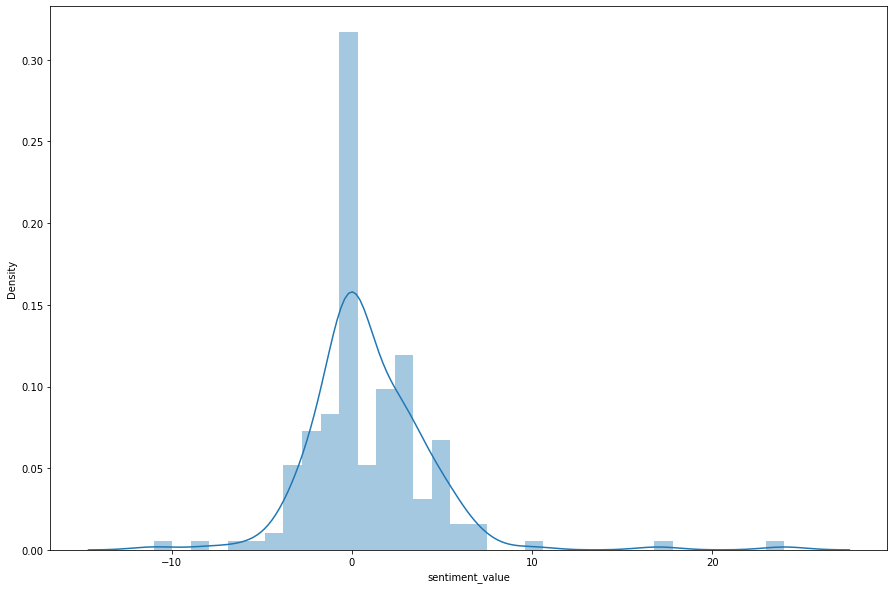

In [ ]:
# Plotting the sentiment value for whole review
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value']) 

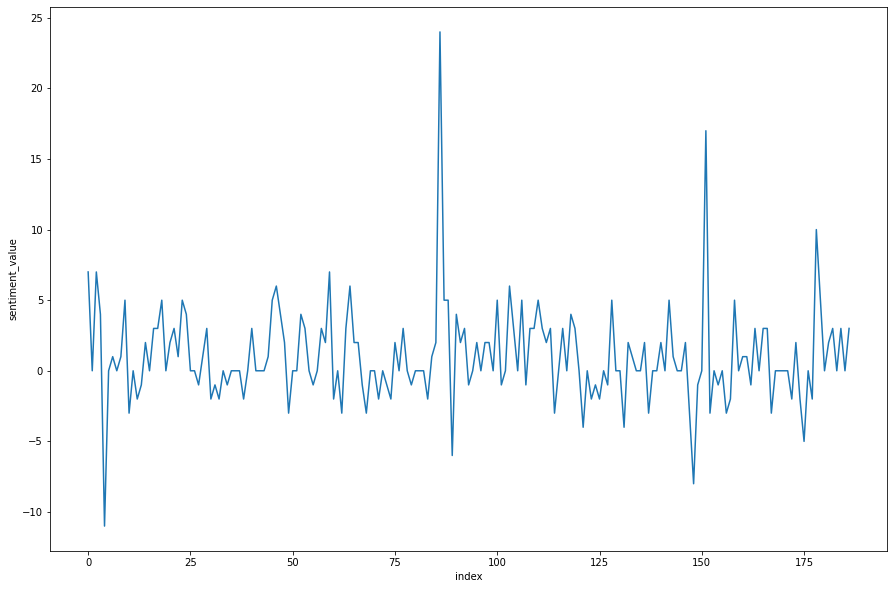

In [ ]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

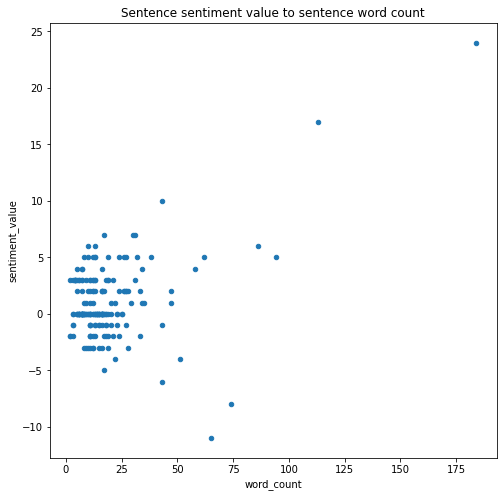

In [ ]:
# Correlation analysis
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')